## Calculate the b-factor for hydrographic data

In [1]:
%load_ext autoreload
%autoreload 2
import so_decadal_variability as so
import numpy as np
from xhistogram.xarray import histogram
import xarray as xr
from dask.diagnostics import ProgressBar

In [4]:
oceanname = 'iap'
timeslice = slice('1979','2018')
save=True

ds = so.process.loaddata_oceanonly(oceanname=oceanname,timeslice=timeslice,roll=False)
ds, xgrid = so.grid.get_xgcm(ds)
b = so.wmt.calc_bfactor(ds,xgrid)
b.name = 'b'

if save:
    with ProgressBar():
        so.process.save_ocean(b,oceanname)

Saving to /local/projects/so_decadal_variability/ocean/SO_ocean_b_iap_197901-201812.nc
[###################################     ] | 88% Completed |  1min 12.0s

/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed |  3min 45.6s


In [3]:
b, abs_drd, abs_dgd = so.wmt._calc_bfactor(ds['ct'],ds['sa'],ds['rho'],ds['alpha'],ds['beta'],ds['gamman'],xgrid)

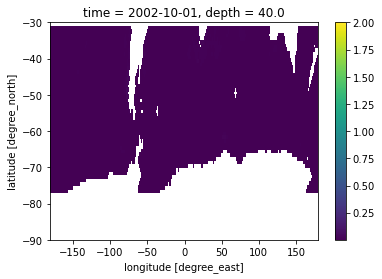

In [8]:
abs_drd.isel(depth=5).sel(time='2002-10-01').plot(vmax=2)